## Import doctor review dataset and gender dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
path = "/Users/chongchen/Desktop/19Fall RA/data/generated_data/Internal Medicine Review.csv"
review_im = pd.read_csv(path, index_col = 0)

In [3]:
review_im.head()

,Review,hp_id,gender,hasorder,lower,no_digits,no_punctuation,words
0,"satisfactory but would not recommend coldness,...",19713,F,0,"satisfactory but would not recommend coldness,...","satisfactory but would not recommend coldness,...",satisfactory but would not recommend coldness ...,"['satisfactory', 'recommend', 'coldness', 'sol..."
1,Although Dr. Merlo does not appear to have an...,19713,F,0,although dr. merlo does not appear to have an...,although dr. merlo does not appear to have an...,although dr merlo does not appear to have an...,"['although', 'dr', 'merlo', 'appear', 'office'..."
2,"took my daughter for problems, never examined...",19713,F,0,"took my daughter for problems, never examined...","took my daughter for problems, never examined...",took my daughter for problems never examined...,"['took', 'daughter', 'problems', 'never', 'exa..."
3,"Yes, Dr. Merlot can be rude and arrogant, but...",19713,F,0,"yes, dr. merlot can be rude and arrogant, but...","yes, dr. merlot can be rude and arrogant, but...",yes dr merlot can be rude and arrogant but...,"['yes', 'dr', 'merlot', 'rude', 'arrogant', 'o..."
4,I called to make and appointment and a woman ...,19713,F,0,i called to make and appointment and a woman ...,i called to make and appointment and a woman ...,i called to make and appointment and a woman ...,"['called', 'make', 'appointment', 'woman', 'ca..."


In [4]:
# drop records without review
review_im.drop(review_im[review_im['Review'] == ' '].index, inplace = True)
review_im.reset_index(inplace = True, drop = True)

In [5]:
review_im['words'][0]

"['satisfactory', 'recommend', 'coldness', 'solo', 'helpfulness', 'limited', 'office', 'staff', 'isolation', 'diagnosis', 'solo']"

In [6]:
import ast
review_im['words'] = review_im['words'].map(lambda x: ast.literal_eval(x))

In [7]:
review_im['words'][0]

['satisfactory',
 'recommend',
 'coldness',
 'solo',
 'helpfulness',
 'limited',
 'office',
 'staff',
 'isolation',
 'diagnosis',
 'solo']

In [8]:
review_im.head()

,Review,hp_id,gender,hasorder,lower,no_digits,no_punctuation,words
0,"satisfactory but would not recommend coldness,...",19713,F,0,"satisfactory but would not recommend coldness,...","satisfactory but would not recommend coldness,...",satisfactory but would not recommend coldness ...,"[satisfactory, recommend, coldness, solo, help..."
1,Although Dr. Merlo does not appear to have an...,19713,F,0,although dr. merlo does not appear to have an...,although dr. merlo does not appear to have an...,although dr merlo does not appear to have an...,"[although, dr, merlo, appear, office, staff, m..."
2,"took my daughter for problems, never examined...",19713,F,0,"took my daughter for problems, never examined...","took my daughter for problems, never examined...",took my daughter for problems never examined...,"[took, daughter, problems, never, examined, un..."
3,"Yes, Dr. Merlot can be rude and arrogant, but...",19713,F,0,"yes, dr. merlot can be rude and arrogant, but...","yes, dr. merlot can be rude and arrogant, but...",yes dr merlot can be rude and arrogant but...,"[yes, dr, merlot, rude, arrogant, one, gastroe..."
4,I called to make and appointment and a woman ...,19713,F,0,i called to make and appointment and a woman ...,i called to make and appointment and a woman ...,i called to make and appointment and a woman ...,"[called, make, appointment, woman, calling, ma..."


#### Add lable to the review based on gender & sanction

In [16]:
review_im['label']=0

In [27]:
review_im['label'][np.logical_and(review_im['gender']=='F',review_im['hasorder']==0)] = 'F0'

In [28]:
review_im['label'][np.logical_and(review_im['gender']=='M',review_im['hasorder']==0)] = 'M0'

In [29]:
review_im['label'][np.logical_and(review_im['gender']=='F',review_im['hasorder']==1)] = 'F1'

In [30]:
review_im['label'][np.logical_and(review_im['gender']=='M',review_im['hasorder']==1)] = 'M1'

In [31]:
review_im

,Review,hp_id,gender,hasorder,lower,no_digits,no_punctuation,words,label
0,"satisfactory but would not recommend coldness,...",19713,F,0,"satisfactory but would not recommend coldness,...","satisfactory but would not recommend coldness,...",satisfactory but would not recommend coldness ...,"[satisfactory, recommend, coldness, solo, help...",F0
1,Although Dr. Merlo does not appear to have an...,19713,F,0,although dr. merlo does not appear to have an...,although dr. merlo does not appear to have an...,although dr merlo does not appear to have an...,"[although, dr, merlo, appear, office, staff, m...",F0
2,"took my daughter for problems, never examined...",19713,F,0,"took my daughter for problems, never examined...","took my daughter for problems, never examined...",took my daughter for problems never examined...,"[took, daughter, problems, never, examined, un...",F0
3,"Yes, Dr. Merlot can be rude and arrogant, but...",19713,F,0,"yes, dr. merlot can be rude and arrogant, but...","yes, dr. merlot can be rude and arrogant, but...",yes dr merlot can be rude and arrogant but...,"[yes, dr, merlot, rude, arrogant, one, gastroe...",F0
4,I called to make and appointment and a woman ...,19713,F,0,i called to make and appointment and a woman ...,i called to make and appointment and a woman ...,i called to make and appointment and a woman ...,"[called, make, appointment, woman, calling, ma...",F0
5,"I, unfortunately,treated with Dr.Merlo severa...",19713,F,0,"i, unfortunately,treated with dr.merlo severa...","i, unfortunately,treated with dr.merlo severa...",i unfortunately treated with dr merlo severa...,"[unfortunately, treated, dr, merlo, several, y...",F0
6,I can't tell you if she's a good or bad docto...,19713,F,0,i can't tell you if she's a good or bad docto...,i can't tell you if she's a good or bad docto...,i can t tell you if she s a good or bad docto...,"[tell, good, bad, doctor, anything, prove, one...",F0
7,Yesterday my partner had an upper endoscopy d...,19713,F,0,yesterday my partner had an upper endoscopy d...,yesterday my partner had an upper endoscopy d...,yesterday my partner had an upper endoscopy d...,"[yesterday, partner, upper, endoscopy, done, d...",F0
8,Very arrogant and rude. Went in with a previo...,19713,F,0,very arrogant and rude. went in with a previo...,very arrogant and rude. went in with a previo...,very arrogant and rude went in with a previo...,"[arrogant, rude, went, previously, diagnosed, ...",F0
9,She files insurance for me even though I have...,19713,F,0,she files insurance for me even though i have...,she files insurance for me even though i have...,she files insurance for me even though i have...,"[files, insurance, even, though, traditional, ...",F0


In [9]:
from gensim.models import Word2Vec

In [10]:
# preparing corpus
documents = list(review_im['words'])

In [11]:
import numpy as np

In [12]:
np.mean([len(i) for i in documents])

23.603743954480798

In [13]:
max([len(i) for i in documents])

143

In [14]:
min([len(i) for i in documents])

0

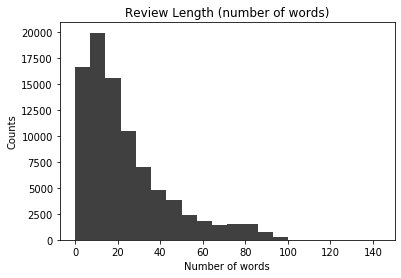

In [29]:
plt.hist([len(i) for i in documents], bins = 20, color = '0.25');
plt.title('Review Length (number of words)');
plt.xlabel('Number of words');
plt.ylabel('Counts');

In [24]:
np.mean([len(i) for i in documents])

23.603743954480798

In [25]:
np.max([len(i) for i in documents])

143

In [26]:
np.min([len(i) for i in documents])

0

In [ ]:
# sentences=None, size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, 
# sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, 
# hashfxn=<built-in function hash>, iter=5, null_word=0, trim_rule=None, sorted_vocab=1, 
# batch_words=10000, compute_loss=False, callbacks=(), max_final_vocab=None

### Hyperparameter setting 1

In [79]:
w2v = Word2Vec(size=300,window=30,min_count=30,workers=4,hs=0, negative=7)
w2v.build_vocab(documents)
w2v.train(documents, total_examples=w2v.corpus_count,epochs=100)

(166350369, 207417900)

In [80]:
w2v.save("w2v_1.model")

In [81]:
w2v_1= Word2Vec.load("w2v_1.model")

In [82]:
w2v_1.wv.most_similar(positive=["dr"])

[('doctor', 0.45916932821273804),
 ('physician', 0.33714205026626587),
 ('always', 0.2492298185825348),
 ('doctors', 0.2401164174079895),
 ('internist', 0.23528248071670532),
 ('wonderful', 0.23021069169044495),
 ('cardiologist', 0.22314128279685974),
 ('rheumatologist', 0.2222317010164261),
 ('recently', 0.22099417448043823),
 ('ago', 0.2200728952884674)]

In [83]:
w2v_1.wv.most_similar(positive=["wonderful"])

[('great', 0.6361227035522461),
 ('excellent', 0.5709502696990967),
 ('amazing', 0.5621974468231201),
 ('fantastic', 0.5557445287704468),
 ('best', 0.4370362460613251),
 ('outstanding', 0.43186086416244507),
 ('kind', 0.429627001285553),
 ('love', 0.42594581842422485),
 ('awesome', 0.3962565064430237),
 ('caring', 0.3905869722366333)]

In [84]:
w2v_1.wv.most_similar(positive=["knowledgeable"])

[('knowledgable', 0.8639764189720154),
 ('knowlegable', 0.4975564479827881),
 ('knowlegeable', 0.4936981797218323),
 ('intelligent', 0.46479690074920654),
 ('competent', 0.4060893654823303),
 ('knowledgeble', 0.3753508925437927),
 ('smart', 0.3406170904636383),
 ('informative', 0.3226452171802521),
 ('knowledge', 0.3130270838737488),
 ('knowledable', 0.2818285822868347)]

In [85]:
w2v_1.wv.most_similar(positive=["caring"])

[('compassionate', 0.40445759892463684),
 ('kind', 0.4009045958518982),
 ('wonderful', 0.3905869722366333),
 ('best', 0.37096530199050903),
 ('excellent', 0.35342130064964294),
 ('amazing', 0.3525526821613312),
 ('cares', 0.3460041880607605),
 ('dedicated', 0.3346731662750244),
 ('always', 0.3220123052597046),
 ('outstanding', 0.30643635988235474)]

In [86]:
w2v_1.wv.most_similar(positive=["rude"])

[('unprofessional', 0.4293363094329834),
 ('unfriendly', 0.4199191927909851),
 ('rudest', 0.4091644883155823),
 ('awful', 0.3667820692062378),
 ('horrible', 0.36254388093948364),
 ('nasty', 0.35845163464546204),
 ('office', 0.32227760553359985),
 ('incompetent', 0.30878907442092896),
 ('worst', 0.3026098608970642),
 ('unhelpful', 0.3024693727493286)]

In [116]:
w2v_1.wv.most_similar(positive=["unprofessional"])

[('rude', 0.4293363690376282),
 ('worst', 0.3758218288421631),
 ('incompetent', 0.3755025267601013),
 ('unhelpful', 0.34632599353790283),
 ('disrespectful', 0.3126639127731323),
 ('poor', 0.30223900079727173),
 ('nasty', 0.3002842664718628),
 ('horrible', 0.2993791103363037),
 ('office', 0.29850995540618896),
 ('inappropriate', 0.2938278019428253)]

In [113]:
w2v_1.wv.most_similar(positive=["staff"])

[('receptionist', 0.4538799524307251),
 ('office', 0.4468477666378021),
 ('manager', 0.42484891414642334),
 ('nurses', 0.386435329914093),
 ('receptionists', 0.36470848321914673),
 ('girls', 0.31627127528190613),
 ('staffs', 0.3086164593696594),
 ('personnel', 0.30408576130867004),
 ('employees', 0.2974265515804291),
 ('nurse', 0.28877168893814087)]

### Hyperparameter setting 2 ( decrease window size from 30 to 20, holding the rest of the parameters constant)

In [87]:
w2v = Word2Vec(size=300,window=20,min_count=30,workers=4,hs=0, negative=7)
w2v.build_vocab(documents)
w2v.train(documents, total_examples=w2v.corpus_count,epochs=100)

(166346723, 207417900)

In [88]:
w2v.save("w2v_2.model")

In [89]:
w2v_2= Word2Vec.load("w2v_2.model")

In [90]:
w2v_2.wv.most_similar(positive=["dr"])

[('doctor', 0.499885618686676),
 ('physician', 0.35943397879600525),
 ('caring', 0.27351146936416626),
 ('wonderful', 0.2715435326099396),
 ('doctors', 0.27112939953804016),
 ('internist', 0.26683175563812256),
 ('attentive', 0.24752208590507507),
 ('years', 0.24271419644355774),
 ('always', 0.23127396404743195),
 ('md', 0.2300117462873459)]

In [91]:
w2v_2.wv.most_similar(positive=["wonderful"])

[('great', 0.6676573753356934),
 ('fantastic', 0.6039437651634216),
 ('amazing', 0.5864121317863464),
 ('excellent', 0.5819053649902344),
 ('outstanding', 0.4711351990699768),
 ('love', 0.4596397578716278),
 ('awesome', 0.45512598752975464),
 ('best', 0.44739729166030884),
 ('kind', 0.43495920300483704),
 ('caring', 0.40091031789779663)]

In [92]:
w2v_2.wv.most_similar(positive=["knowledgeable"])

[('knowledgable', 0.872672438621521),
 ('knowlegeable', 0.5337325930595398),
 ('knowlegable', 0.5008127689361572),
 ('intelligent', 0.49439045786857605),
 ('competent', 0.4410247206687927),
 ('knowledgeble', 0.4326866567134857),
 ('smart', 0.372468501329422),
 ('informative', 0.33169686794281006),
 ('knowledge', 0.3290414810180664),
 ('always', 0.31108731031417847)]

In [93]:
w2v_2.wv.most_similar(positive=["caring"])

[('compassionate', 0.45195484161376953),
 ('kind', 0.439325213432312),
 ('wonderful', 0.400910347700119),
 ('excellent', 0.39074063301086426),
 ('best', 0.37418651580810547),
 ('cares', 0.3703380823135376),
 ('amazing', 0.3685465455055237),
 ('personable', 0.35715487599372864),
 ('outstanding', 0.3332512378692627),
 ('always', 0.3301669657230377)]

In [94]:
w2v_2.wv.most_similar(positive=["rude"])

[('unfriendly', 0.4604812264442444),
 ('unprofessional', 0.46043726801872253),
 ('rudest', 0.4293581247329712),
 ('nasty', 0.4158737063407898),
 ('horrible', 0.38154932856559753),
 ('awful', 0.3784559667110443),
 ('cold', 0.34814268350601196),
 ('incompetent', 0.3295789361000061),
 ('office', 0.3293423354625702),
 ('worst', 0.325403094291687)]

In [115]:
w2v_2.wv.most_similar(positive=["unprofessional"])

[('rude', 0.46043726801872253),
 ('incompetent', 0.37825608253479004),
 ('worst', 0.36913442611694336),
 ('unhelpful', 0.3389741778373718),
 ('horrible', 0.3248497247695923),
 ('hung', 0.31699997186660767),
 ('disrespectful', 0.30897754430770874),
 ('arrogant', 0.3069496750831604),
 ('inappropriate', 0.30423203110694885),
 ('unacceptable', 0.3038337826728821)]

In [112]:
w2v_2.wv.most_similar(positive=["staff"])

[('receptionist', 0.47950059175491333),
 ('office', 0.44798043370246887),
 ('manager', 0.42761117219924927),
 ('nurses', 0.426509827375412),
 ('receptionists', 0.3992658257484436),
 ('employees', 0.3421250581741333),
 ('staffs', 0.3243516683578491),
 ('girls', 0.3224979043006897),
 ('assistants', 0.31105226278305054),
 ('unorganized', 0.3098085820674896)]

### Hyperparameter setting 3 ( increase window size to 40, holding the rest of the parameters constant)

In [95]:
w2v = Word2Vec(size=300,window=40,min_count=30,workers=4,hs=0, negative=7)
w2v.build_vocab(documents)
w2v.train(documents, total_examples=w2v.corpus_count,epochs=100)

(166356147, 207417900)

In [96]:
w2v.save("w2v_3.model")

In [97]:
w2v_3= Word2Vec.load("w2v_3.model")

In [98]:
w2v_3.wv.most_similar(positive=["dr"])

[('doctor', 0.42630183696746826),
 ('physician', 0.31893548369407654),
 ('doctors', 0.2616861164569855),
 ('grateful', 0.24166131019592285),
 ('always', 0.2322029173374176),
 ('drs', 0.2282935380935669),
 ('wonderful', 0.2188992202281952),
 ('immediately', 0.21527288854122162),
 ('internist', 0.208210289478302),
 ('years', 0.206084743142128)]

In [99]:
w2v_3.wv.most_similar(positive=["wonderful"])

[('great', 0.6171221733093262),
 ('amazing', 0.5562236309051514),
 ('excellent', 0.5461385846138),
 ('fantastic', 0.538554310798645),
 ('best', 0.43518808484077454),
 ('love', 0.41388916969299316),
 ('outstanding', 0.40590786933898926),
 ('awesome', 0.4016324579715729),
 ('kind', 0.39836710691452026),
 ('caring', 0.3855302631855011)]

In [100]:
w2v_3.wv.most_similar(positive=["knowledgeable"])

[('knowledgable', 0.8495000004768372),
 ('knowlegeable', 0.450377881526947),
 ('knowlegable', 0.4472546875476837),
 ('intelligent', 0.4406425356864929),
 ('competent', 0.3907619118690491),
 ('knowledgeble', 0.3601892590522766),
 ('smart', 0.32877317070961),
 ('informative', 0.3192101716995239),
 ('knowledge', 0.30176621675491333),
 ('always', 0.2606216073036194)]

In [101]:
w2v_3.wv.most_similar(positive=["caring"])

[('wonderful', 0.3855302631855011),
 ('compassionate', 0.3853279948234558),
 ('kind', 0.3682704269886017),
 ('best', 0.3529529571533203),
 ('always', 0.3463168144226074),
 ('cares', 0.33644816279411316),
 ('excellent', 0.3299354910850525),
 ('amazing', 0.3298393189907074),
 ('outstanding', 0.289012610912323),
 ('dedicated', 0.2821180820465088)]

In [102]:
w2v_3.wv.most_similar(positive=["rude"])

[('unprofessional', 0.4077616333961487),
 ('rudest', 0.38368290662765503),
 ('awful', 0.3594316244125366),
 ('nasty', 0.34824907779693604),
 ('unfriendly', 0.3460191786289215),
 ('horrible', 0.3386519253253937),
 ('office', 0.30691030621528625),
 ('worst', 0.29962262511253357),
 ('unhelpful', 0.2923283278942108),
 ('told', 0.2854226231575012)]

In [114]:
w2v_3.wv.most_similar(positive=["unprofessional"])

[('rude', 0.4077616333961487),
 ('worst', 0.3490385413169861),
 ('incompetent', 0.3211132884025574),
 ('office', 0.3169613182544708),
 ('disrespectful', 0.3127964735031128),
 ('inappropriate', 0.296947717666626),
 ('horrible', 0.2877311110496521),
 ('unhelpful', 0.2872677445411682),
 ('nasty', 0.28635454177856445),
 ('poor', 0.2732802629470825)]

In [111]:
w2v_3.wv.most_similar(positive=["staff"])

[('office', 0.4596254825592041),
 ('receptionist', 0.4453253149986267),
 ('manager', 0.41683048009872437),
 ('nurses', 0.3822271525859833),
 ('receptionists', 0.347592294216156),
 ('service', 0.3028676509857178),
 ('staffs', 0.3011287748813629),
 ('employees', 0.297333300113678),
 ('billing', 0.29284152388572693),
 ('girls', 0.2866860330104828)]

### Hyperparameter setting 4 ( change the window size to 35, holding the rest of the parameters constant)

In [72]:
w2v = Word2Vec(size=300,window=35,min_count=30,workers=4,hs=0, negative=7)
w2v.build_vocab(documents)
w2v.train(documents, total_examples=w2v.corpus_count,epochs=100)

(166354457, 207417900)

In [78]:
w2v.save("w2v_4.model")

In [103]:
w2v_4= Word2Vec.load("w2v_4.model")

In [104]:
w2v_4.wv.most_similar(positive=["dr"])

[('doctor', 0.4137003421783447),
 ('physician', 0.3113670349121094),
 ('always', 0.2740619480609894),
 ('doctors', 0.25287771224975586),
 ('recently', 0.23316174745559692),
 ('wonderful', 0.22798559069633484),
 ('internist', 0.22430753707885742),
 ('happy', 0.22162382304668427),
 ('attentive', 0.21890303492546082),
 ('pleased', 0.21853145956993103)]

In [105]:
w2v_4.wv.most_similar(positive=["wonderful"])

[('great', 0.6200506687164307),
 ('fantastic', 0.5493857860565186),
 ('excellent', 0.5458062291145325),
 ('amazing', 0.5314452052116394),
 ('best', 0.438632607460022),
 ('kind', 0.4210386276245117),
 ('outstanding', 0.4168912172317505),
 ('awesome', 0.41104668378829956),
 ('love', 0.408115953207016),
 ('caring', 0.388559490442276)]

In [106]:
w2v_4.wv.most_similar(positive=["knowledgeable"])

[('knowledgable', 0.8596457242965698),
 ('knowlegeable', 0.483573317527771),
 ('knowlegable', 0.47059398889541626),
 ('intelligent', 0.43237441778182983),
 ('competent', 0.39518097043037415),
 ('knowledgeble', 0.38079333305358887),
 ('smart', 0.3555871248245239),
 ('knowledge', 0.29687124490737915),
 ('always', 0.28782323002815247),
 ('informative', 0.2796274423599243)]

In [107]:
w2v_4.wv.most_similar(positive=["caring"])

[('kind', 0.41506582498550415),
 ('compassionate', 0.3977191150188446),
 ('wonderful', 0.388559490442276),
 ('best', 0.36833930015563965),
 ('excellent', 0.3447863459587097),
 ('amazing', 0.34190112352371216),
 ('cares', 0.3362942337989807),
 ('always', 0.3321238160133362),
 ('dedicated', 0.30629539489746094),
 ('personable', 0.30174383521080017)]

In [108]:
w2v_4.wv.most_similar(positive=["rude"])

[('unprofessional', 0.4353541135787964),
 ('unfriendly', 0.40955424308776855),
 ('rudest', 0.4000231623649597),
 ('awful', 0.36272478103637695),
 ('nasty', 0.3527188301086426),
 ('horrible', 0.34923985600471497),
 ('office', 0.3192899227142334),
 ('rudely', 0.3074188530445099),
 ('cold', 0.2972487807273865),
 ('unhelpful', 0.2953112721443176)]

In [109]:
w2v_4.wv.most_similar(positive=["unprofessional"])

[('rude', 0.4353541135787964),
 ('worst', 0.3636912703514099),
 ('incompetent', 0.33620721101760864),
 ('office', 0.3111066222190857),
 ('nasty', 0.3103058934211731),
 ('horrible', 0.31019556522369385),
 ('poor', 0.309330552816391),
 ('unhelpful', 0.29595911502838135),
 ('disrespectful', 0.29430824518203735),
 ('unacceptable', 0.29147595167160034)]

In [110]:
w2v_4.wv.most_similar(positive=["staff"])

[('office', 0.4611814022064209),
 ('receptionist', 0.4251977205276489),
 ('manager', 0.4200279116630554),
 ('nurses', 0.3813477158546448),
 ('receptionists', 0.3339008688926697),
 ('employees', 0.3162460923194885),
 ('personnel', 0.2974974513053894),
 ('staffs', 0.296334445476532),
 ('girls', 0.29333484172821045),
 ('service', 0.29294687509536743)]

### Run Doc2vec - gender

In [32]:
documents[0][0]

'satisfactory'

In [33]:
gender = list(review_im['gender'])
hasorder = list(review_im['hasorder'])

In [34]:
len(documents),len(gender),len(hasorder)

(87875, 87875, 87875)

In [123]:
# Tag document
import gensim
docs = [] # each review/row is a tagged document.
for i in range(len(documents)):
    docs.append(gensim.models.doc2vec.TaggedDocument(documents[i], [gender[i]]))

In [124]:
docs[0]

TaggedDocument(words=['satisfactory', 'recommend', 'coldness', 'solo', 'helpfulness', 'limited', 'office', 'staff', 'isolation', 'diagnosis', 'solo'], tags=['F'])

In [125]:
docs_for_vocab = [] 
for i in docs:
    docs_for_vocab.append(i)

In [41]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import gensim
import multiprocessing

In [133]:
model = Doc2Vec(dm=0, window=30,vector_size=300,min_count=30,epochs=100,workers=4,
               hs=0,negative=7,dbow_words=1,dm_concat=1)
model.build_vocab(docs_for_vocab)
model.train(documents = docs,total_examples=model.corpus_count,epochs=100)

In [134]:
model.save("d2v_g1.model")

In [49]:
d2v_g1= Doc2Vec.load("d2v_g1.model")

In [52]:
d2v_g1.wv.most_similar(positive = [d2v_g1.docvecs['F']],topn=500)

[('dr', 0.7431488633155823),
 ('doctor', 0.7271621227264404),
 ('caring', 0.6368781328201294),
 ('staff', 0.6312354803085327),
 ('office', 0.6301532983779907),
 ('extremely', 0.629963755607605),
 ('time', 0.6232239007949829),
 ('really', 0.6171454787254333),
 ('knowledgeable', 0.6163986921310425),
 ('always', 0.6149625778198242),
 ('patient', 0.6130982637405396),
 ('never', 0.6121476888656616),
 ('kind', 0.610569179058075),
 ('see', 0.6052374839782715),
 ('friendly', 0.5981082916259766),
 ('helpful', 0.5978922843933105),
 ('thorough', 0.5870985984802246),
 ('going', 0.5819225311279297),
 ('professional', 0.5779584050178528),
 ('well', 0.5746647119522095),
 ('one', 0.5737192630767822),
 ('good', 0.5691540837287903),
 ('patients', 0.565822958946228),
 ('compassionate', 0.5642505884170532),
 ('personable', 0.561754584312439),
 ('seen', 0.5613508224487305),
 ('think', 0.5581833124160767),
 ('great', 0.5574188828468323),
 ('attentive', 0.5564973950386047),
 ('concerns', 0.5551470518112183),

In [51]:
d2v_g1.wv.most_similar(positive = [d2v_g1.docvecs['F']],topn=100)

[('dr', 0.7431488633155823),
 ('doctor', 0.7271621227264404),
 ('caring', 0.6368781328201294),
 ('staff', 0.6312354803085327),
 ('office', 0.6301532983779907),
 ('extremely', 0.629963755607605),
 ('time', 0.6232239007949829),
 ('really', 0.6171454787254333),
 ('knowledgeable', 0.6163986921310425),
 ('always', 0.6149625778198242),
 ('patient', 0.6130982637405396),
 ('never', 0.6121476888656616),
 ('kind', 0.610569179058075),
 ('see', 0.6052374839782715),
 ('friendly', 0.5981082916259766),
 ('helpful', 0.5978922843933105),
 ('thorough', 0.5870985984802246),
 ('going', 0.5819225311279297),
 ('professional', 0.5779584050178528),
 ('well', 0.5746647119522095),
 ('one', 0.5737192630767822),
 ('good', 0.5691540837287903),
 ('patients', 0.565822958946228),
 ('compassionate', 0.5642505884170532),
 ('personable', 0.561754584312439),
 ('seen', 0.5613508224487305),
 ('think', 0.5581833124160767),
 ('great', 0.5574188828468323),
 ('attentive', 0.5564973950386047),
 ('concerns', 0.5551470518112183),

In [53]:
d2v_g1.wv.most_similar(positive = [d2v_g1.docvecs['M']],topn=500)

[('dr', 0.8281524181365967),
 ('doctor', 0.8166409134864807),
 ('kind', 0.7272549271583557),
 ('patient', 0.7099394202232361),
 ('caring', 0.7075568437576294),
 ('extremely', 0.6939889788627625),
 ('great', 0.6927266120910645),
 ('well', 0.6783657073974609),
 ('good', 0.6746696829795837),
 ('one', 0.6743701696395874),
 ('time', 0.6675636768341064),
 ('helpful', 0.6650533676147461),
 ('knowledgeable', 0.6624915599822998),
 ('professional', 0.661713719367981),
 ('excellent', 0.6578822135925293),
 ('staff', 0.6504886150360107),
 ('compassionate', 0.6467208862304688),
 ('never', 0.6451191306114197),
 ('really', 0.6367144584655762),
 ('patients', 0.636133074760437),
 ('wonderful', 0.6330146193504333),
 ('personable', 0.6284362077713013),
 ('always', 0.6224740743637085),
 ('recommend', 0.6212443709373474),
 ('physician', 0.6206147074699402),
 ('office', 0.6183151006698608),
 ('man', 0.613883376121521),
 ('found', 0.6128324270248413),
 ('know', 0.6113676428794861),
 ('go', 0.6110764145851135)

### Run Doc2vec - gender & sanction

In [144]:
# Tag document
import gensim
docs_gs = [] # each review/row is a tagged document.
for i in range(len(documents)):
    docs_gs.append(gensim.models.doc2vec.TaggedDocument(documents[i],  [hasorder[i],gender[i]]))

In [145]:
docs_gs[0]

TaggedDocument(words=['satisfactory', 'recommend', 'coldness', 'solo', 'helpfulness', 'limited', 'office', 'staff', 'isolation', 'diagnosis', 'solo'], tags=[0, 'F'])

In [146]:
docs_for_vocab_gs = [] 
for i in docs_gs:
    docs_for_vocab_gs.append(i)

In [147]:
model_gs = Doc2Vec(dm=0, window=30,vector_size=300,min_count=30,epochs=100,workers=4,
               hs=0,negative=7,dbow_words=1,dm_concat=1)
model_gs.build_vocab(docs_for_vocab_gs)
model_gs.train(documents = docs_gs,total_examples=model_gs.corpus_count,epochs=100)

In [148]:
model_gs.save("d2v_gs1.model")

In [54]:
d2v_gs1= Doc2Vec.load("d2v_gs1.model")

In [55]:
d2v_gs1.wv.most_similar(positive = [d2v_gs1.docvecs[0],d2v_gs1.docvecs['F']],topn=15)

[('dr', 0.8382483124732971),
 ('doctor', 0.8094700574874878),
 ('caring', 0.7179374694824219),
 ('patient', 0.7118537425994873),
 ('kind', 0.7015848159790039),
 ('extremely', 0.6905013918876648),
 ('time', 0.6878834366798401),
 ('staff', 0.6851698756217957),
 ('knowledgeable', 0.6844163537025452),
 ('always', 0.6755608320236206),
 ('never', 0.6683287620544434),
 ('really', 0.6661325097084045),
 ('office', 0.6633327007293701),
 ('helpful', 0.6618456840515137),
 ('great', 0.6505095362663269)]

In [56]:
d2v_gs1.wv.most_similar(positive = [d2v_gs1.docvecs[0],d2v_gs1.docvecs['M']],topn=15)

[('dr', 0.8472877740859985),
 ('doctor', 0.8312726020812988),
 ('patient', 0.7375615835189819),
 ('caring', 0.7362607717514038),
 ('kind', 0.7360689640045166),
 ('great', 0.7048937082290649),
 ('extremely', 0.70399010181427),
 ('knowledgeable', 0.6948617100715637),
 ('good', 0.6827594041824341),
 ('time', 0.6805500984191895),
 ('professional', 0.679201066493988),
 ('one', 0.6737104654312134),
 ('staff', 0.6704651713371277),
 ('excellent', 0.6696045398712158),
 ('always', 0.6638321876525879)]

In [57]:
d2v_gs1.wv.most_similar(positive = [d2v_gs1.docvecs[1],d2v_gs1.docvecs['F']],topn=15)

[('doctor', 0.5625770092010498),
 ('dr', 0.5559017658233643),
 ('always', 0.5051372647285461),
 ('staff', 0.4993571639060974),
 ('office', 0.48801589012145996),
 ('caring', 0.48241108655929565),
 ('never', 0.47603607177734375),
 ('time', 0.4671357274055481),
 ('kind', 0.4612017869949341),
 ('patient', 0.46081849932670593),
 ('one', 0.46024295687675476),
 ('see', 0.4597282111644745),
 ('well', 0.45818468928337097),
 ('patients', 0.45670783519744873),
 ('helpful', 0.4463525414466858)]

In [58]:
d2v_gs1.wv.most_similar(positive = [d2v_gs1.docvecs[1],d2v_gs1.docvecs['F']],topn=50)

[('doctor', 0.5625770092010498),
 ('dr', 0.5559017658233643),
 ('always', 0.5051372647285461),
 ('staff', 0.4993571639060974),
 ('office', 0.48801589012145996),
 ('caring', 0.48241108655929565),
 ('never', 0.47603607177734375),
 ('time', 0.4671357274055481),
 ('kind', 0.4612017869949341),
 ('patient', 0.46081849932670593),
 ('one', 0.46024295687675476),
 ('see', 0.4597282111644745),
 ('well', 0.45818468928337097),
 ('patients', 0.45670783519744873),
 ('helpful', 0.4463525414466858),
 ('really', 0.44581717252731323),
 ('care', 0.440998375415802),
 ('friendly', 0.43865716457366943),
 ('health', 0.4283149838447571),
 ('attentive', 0.4279366731643677),
 ('wonderful', 0.42672255635261536),
 ('found', 0.4221644401550293),
 ('compassionate', 0.42198508977890015),
 ('person', 0.4210626780986786),
 ('takes', 0.41938433051109314),
 ('knowledgeable', 0.41884100437164307),
 ('good', 0.41766059398651123),
 ('extremely', 0.41695132851600647),
 ('dube', 0.4167664349079132),
 ('wait', 0.41645157337188

In [59]:
d2v_gs1.wv.most_similar(positive = [d2v_gs1.docvecs[1],d2v_gs1.docvecs['M']],topn=15)

[('doctor', 0.5769614577293396),
 ('dr', 0.5612245202064514),
 ('always', 0.49770617485046387),
 ('caring', 0.49418675899505615),
 ('staff', 0.489698588848114),
 ('kind', 0.483650267124176),
 ('well', 0.4821067154407501),
 ('patient', 0.4772361218929291),
 ('one', 0.4758063554763794),
 ('office', 0.4652448296546936),
 ('patients', 0.4650103449821472),
 ('never', 0.4641687870025635),
 ('time', 0.461802214384079),
 ('care', 0.45553481578826904),
 ('great', 0.44906601309776306)]

In [60]:
d2v_gs1.wv.most_similar(positive = [d2v_gs1.docvecs[0]],topn=15)

[('dr', 0.8538498878479004),
 ('doctor', 0.832461416721344),
 ('patient', 0.7403160929679871),
 ('caring', 0.7391586303710938),
 ('kind', 0.7352221608161926),
 ('extremely', 0.7071716785430908),
 ('knowledgeable', 0.6993880271911621),
 ('great', 0.6979334354400635),
 ('time', 0.6920329928398132),
 ('good', 0.6822013854980469),
 ('staff', 0.6806690692901611),
 ('professional', 0.6767474412918091),
 ('always', 0.6750561594963074),
 ('one', 0.6736839413642883),
 ('helpful', 0.6690742373466492)]

In [61]:
d2v_gs1.wv.most_similar(positive = [d2v_gs1.docvecs[1]],topn=15)

[('dube', 0.39721789956092834),
 ('campbell', 0.3843143582344055),
 ('doctor', 0.3577578663825989),
 ('always', 0.33449411392211914),
 ('dr', 0.3343508243560791),
 ('staff', 0.32169395685195923),
 ('office', 0.31142789125442505),
 ('well', 0.3097817301750183),
 ('ill', 0.3081333637237549),
 ('hrs', 0.3058217465877533),
 ('rarely', 0.30576738715171814),
 ('never', 0.300335168838501),
 ('one', 0.2994637191295624),
 ('care', 0.29857611656188965),
 ('caring', 0.2972704768180847)]

In [62]:
d2v_gs1.wv.most_similar(positive = [d2v_gs1.docvecs['F']],topn=15)

[('dr', 0.7437809705734253),
 ('doctor', 0.7114667892456055),
 ('caring', 0.6303064823150635),
 ('staff', 0.6227116584777832),
 ('patient', 0.6186176538467407),
 ('time', 0.6177635192871094),
 ('office', 0.6148641109466553),
 ('always', 0.610614538192749),
 ('extremely', 0.6094182729721069),
 ('never', 0.6071034669876099),
 ('knowledgeable', 0.6053750514984131),
 ('kind', 0.604915976524353),
 ('really', 0.6020890474319458),
 ('see', 0.5960661768913269),
 ('helpful', 0.591611921787262)]

In [167]:
d2v_gs1.wv.most_similar(positive = [d2v_gs1.docvecs['M']],topn=15)

[('dr', 0.8217996954917908),
 ('doctor', 0.8113111853599548),
 ('kind', 0.720219075679779),
 ('patient', 0.7182170152664185),
 ('caring', 0.7168076634407043),
 ('great', 0.6956250667572021),
 ('extremely', 0.6849950551986694),
 ('knowledgeable', 0.6747809648513794),
 ('good', 0.6678390502929688),
 ('professional', 0.6661829948425293),
 ('excellent', 0.6639824509620667),
 ('one', 0.6584840416908264),
 ('time', 0.6541075706481934),
 ('well', 0.6520220041275024),
 ('staff', 0.6454800963401794)]

### Run Doc2vec - gender & sanction (downsampling)

In [191]:
#1000 sanction male/female reviews and 1000 not sanction male/female reviews
import random
repeat = {}
indices = []
batch = []
draw = 1000
sf_candidates = list(review_im[np.logical_and(review_im['hasorder']==1, review_im['gender']=='F')].index)
sm_candidates = list(review_im[np.logical_and(review_im['hasorder']==1, review_im['gender']=='M')].index)
nsf_candidates = list(review_im[np.logical_and(review_im['hasorder']==0, review_im['gender']=='F')].index)
nsm_candidates = list(review_im[np.logical_and(review_im['hasorder']==0, review_im['gender']=='M')].index)
for b in range(draw):
    sf = random.choice(sf_candidates)
    sm = random.choice(sm_candidates)
    indices.append(sf)
    indices.append(sm)
    nsf = random.choice(nsf_candidates)
    nsm = random.choice(nsm_candidates)
    indices.append(nsf)
    indices.append(nsm)
for i in indices:
    try:
        repeat[i]+=1
    except:
        repeat[i]=1
    batch.append(docs_gs[i])

In [192]:
batch[1]

TaggedDocument(words=['year', 'old', 'mother', 'doctor', 'handled', 'medical', 'problems', 'efficiently', 'quickly'], tags=[1, 'M'])

In [193]:
model_gs2 = Doc2Vec(dm=0, window=30,vector_size=300,min_count=30,epochs=100,workers=4,
               hs=0,negative=7,dbow_words=1,dm_concat=1)
model_gs2.build_vocab(docs_for_vocab_gs)
model_gs2.train(documents = batch,total_examples=model_gs2.corpus_count,epochs=100)

In [194]:
model_gs2.save("d2v_gs2.model")

In [195]:
d2v_gs2= Doc2Vec.load("d2v_gs2.model")

In [196]:
d2v_gs2.wv.most_similar(positive = [d2v_gs2.docvecs[0],d2v_gs2.docvecs['F']],topn=15)

[('gray', 0.24918320775032043),
 ('pounds', 0.20344123244285583),
 ('brought', 0.19911789894104004),
 ('minimum', 0.19493170082569122),
 ('policies', 0.19451665878295898),
 ('rest', 0.1934053897857666),
 ('able', 0.17871588468551636),
 ('handled', 0.17821919918060303),
 ('alive', 0.17520007491111755),
 ('aging', 0.17208871245384216),
 ('closed', 0.1717839241027832),
 ('cordial', 0.16856342554092407),
 ('gift', 0.16764169931411743),
 ('squeezed', 0.16756188869476318),
 ('diagnosis', 0.16272571682929993)]

In [197]:
d2v_gs2.wv.most_similar(positive = [d2v_gs2.docvecs[0],d2v_gs2.docvecs['M']],topn=15)

[('gray', 0.23987627029418945),
 ('waiting', 0.19972291588783264),
 ('policies', 0.19850175082683563),
 ('rest', 0.19551360607147217),
 ('experiencing', 0.18157005310058594),
 ('minimum', 0.18136093020439148),
 ('grow', 0.18134796619415283),
 ('pounds', 0.1810140460729599),
 ('fat', 0.17606505751609802),
 ('grown', 0.17593801021575928),
 ('cancel', 0.1757582128047943),
 ('bay', 0.17228317260742188),
 ('approximately', 0.17116057872772217),
 ('card', 0.16847121715545654),
 ('event', 0.16711288690567017)]

In [198]:
d2v_gs2.wv.most_similar(positive = [d2v_gs2.docvecs[1],d2v_gs2.docvecs['F']],topn=15)

[('owns', 0.184118390083313),
 ('diagnosis', 0.17707176506519318),
 ('quote', 0.1651272475719452),
 ('young', 0.1641160249710083),
 ('ny', 0.16226349771022797),
 ('try', 0.15008506178855896),
 ('reserved', 0.149661123752594),
 ('walked', 0.1488909125328064),
 ('exceeded', 0.14293338358402252),
 ('controlled', 0.13887512683868408),
 ('hot', 0.13856971263885498),
 ('among', 0.1385170966386795),
 ('tylenol', 0.13772054016590118),
 ('demanded', 0.13759729266166687),
 ('canada', 0.135684072971344)]

In [199]:
d2v_gs2.wv.most_similar(positive = [d2v_gs2.docvecs[1],d2v_gs2.docvecs['M']],topn=15)

[('owns', 0.18986749649047852),
 ('diagnosis', 0.18072928488254547),
 ('reserved', 0.17450737953186035),
 ('try', 0.16331881284713745),
 ('canada', 0.16206324100494385),
 ('ny', 0.16059726476669312),
 ('quote', 0.15931221842765808),
 ('controlled', 0.15804603695869446),
 ('young', 0.15792176127433777),
 ('instructed', 0.15063264966011047),
 ('reachable', 0.14042948186397552),
 ('among', 0.13898608088493347),
 ('wrote', 0.13796506822109222),
 ('customers', 0.13701796531677246),
 ('returning', 0.13352620601654053)]

### Run Doc2vec - gender & sanction (upsampling)

In [204]:
#1000 sanction male/female reviews and 1000 not sanction male/female reviews
import random
repeat = {}
indices = []
batch2 = []
draw = 10000
sf_candidates = list(review_im[np.logical_and(review_im['hasorder']==1, review_im['gender']=='F')].index)
sm_candidates = list(review_im[np.logical_and(review_im['hasorder']==1, review_im['gender']=='M')].index)
nsf_candidates = list(review_im[np.logical_and(review_im['hasorder']==0, review_im['gender']=='F')].index)
nsm_candidates = list(review_im[np.logical_and(review_im['hasorder']==0, review_im['gender']=='M')].index)
for b in range(draw):
    sf = random.choice(sf_candidates)
    sm = random.choice(sm_candidates)
    indices.append(sf)
    indices.append(sm)
    nsf = random.choice(nsf_candidates)
    nsm = random.choice(nsm_candidates)
    indices.append(nsf)
    indices.append(nsm)
for i in indices:
    try:
        repeat[i]+=1
    except:
        repeat[i]=1
    batch2.append(docs_gs[i])

In [205]:
len(batch2)

40000

In [206]:
model_gs3 = Doc2Vec(dm=0, window=30,vector_size=300,min_count=30,epochs=100,workers=4,
               hs=0,negative=7,dbow_words=1,dm_concat=1)
model_gs3.build_vocab(docs_for_vocab_gs)
model_gs3.train(documents = batch2,total_examples=model_gs2.corpus_count,epochs=100)

In [207]:
model_gs3.save("d2v_gs3.model")

In [208]:
d2v_gs3= Doc2Vec.load("d2v_gs3.model")

In [209]:
d2v_gs3.wv.most_similar(positive = [d2v_gs3.docvecs[0],d2v_gs3.docvecs['F']],topn=15)

[('dr', 0.5724689364433289),
 ('doctor', 0.49950820207595825),
 ('time', 0.43546438217163086),
 ('staff', 0.4080578684806824),
 ('office', 0.3696812391281128),
 ('patient', 0.36583051085472107),
 ('care', 0.36055541038513184),
 ('one', 0.3587050437927246),
 ('see', 0.35299962759017944),
 ('never', 0.35087186098098755),
 ('questions', 0.3377339243888855),
 ('years', 0.3343408405780792),
 ('found', 0.33351242542266846),
 ('manner', 0.32705754041671753),
 ('bedside', 0.32702577114105225)]

In [210]:
d2v_gs3.wv.most_similar(positive = [d2v_gs3.docvecs[0],d2v_gs3.docvecs['M']],topn=15)

[('dr', 0.4985211491584778),
 ('doctor', 0.4801616370677948),
 ('one', 0.40479540824890137),
 ('time', 0.3816603422164917),
 ('highly', 0.37834638357162476),
 ('top', 0.3756328821182251),
 ('well', 0.3724502623081207),
 ('compassionate', 0.36480942368507385),
 ('really', 0.35604971647262573),
 ('years', 0.35145482420921326),
 ('bad', 0.3506760001182556),
 ('patients', 0.3496653139591217),
 ('caring', 0.3473668098449707),
 ('excellent', 0.34657877683639526),
 ('never', 0.34541070461273193)]

In [211]:
d2v_gs3.wv.most_similar(positive = [d2v_gs3.docvecs[1],d2v_gs3.docvecs['F']],topn=15)

[('dr', 0.5598286390304565),
 ('doctor', 0.42158520221710205),
 ('time', 0.3732236325740814),
 ('staff', 0.3562275171279907),
 ('care', 0.35531941056251526),
 ('office', 0.32850828766822815),
 ('dube', 0.2996673583984375),
 ('years', 0.29861557483673096),
 ('patient', 0.29857200384140015),
 ('one', 0.2943735122680664),
 ('see', 0.2917926609516144),
 ('never', 0.2857934832572937),
 ('even', 0.27929872274398804),
 ('rude', 0.2738555669784546),
 ('medical', 0.2731856107711792)]

In [226]:
d2v_gs3.wv.most_similar(positive = [d2v_gs3.docvecs[1],d2v_gs3.docvecs['F']],topn=50)

[('dr', 0.5598286390304565),
 ('doctor', 0.42158520221710205),
 ('time', 0.3732236325740814),
 ('staff', 0.3562275171279907),
 ('care', 0.35531941056251526),
 ('office', 0.32850828766822815),
 ('dube', 0.2996673583984375),
 ('years', 0.29861557483673096),
 ('patient', 0.29857200384140015),
 ('one', 0.2943735122680664),
 ('see', 0.2917926609516144),
 ('never', 0.2857934832572937),
 ('even', 0.27929872274398804),
 ('rude', 0.2738555669784546),
 ('medical', 0.2731856107711792),
 ('campbell', 0.26341578364372253),
 ('treatment', 0.2624831199645996),
 ('always', 0.2579416036605835),
 ('well', 0.2572850286960602),
 ('doctors', 0.2537463307380676),
 ('patients', 0.2531205713748932),
 ('good', 0.24911291897296906),
 ('questions', 0.24425888061523438),
 ('great', 0.24260182678699493),
 ('go', 0.24184852838516235),
 ('told', 0.24166005849838257),
 ('issues', 0.24079269170761108),
 ('practice', 0.23978261649608612),
 ('amp', 0.23886026442050934),
 ('visit', 0.23775695264339447),
 ('lot', 0.235881

In [212]:
d2v_gs3.wv.most_similar(positive = [d2v_gs3.docvecs[1],d2v_gs3.docvecs['M']],topn=15)

[('dr', 0.5190690755844116),
 ('doctor', 0.41704756021499634),
 ('time', 0.3429281711578369),
 ('one', 0.33390501141548157),
 ('care', 0.32987773418426514),
 ('years', 0.3174331784248352),
 ('staff', 0.31650128960609436),
 ('well', 0.3153061270713806),
 ('office', 0.3011116683483124),
 ('good', 0.28827792406082153),
 ('never', 0.2882222533226013),
 ('patients', 0.2870241105556488),
 ('patient', 0.28100883960723877),
 ('caring', 0.27199840545654297),
 ('always', 0.26913994550704956)]

In [227]:
d2v_gs3.wv.most_similar(positive = [d2v_gs3.docvecs[1],d2v_gs3.docvecs['M']],topn=50)

[('dr', 0.5190690755844116),
 ('doctor', 0.41704756021499634),
 ('time', 0.3429281711578369),
 ('one', 0.33390501141548157),
 ('care', 0.32987773418426514),
 ('years', 0.3174331784248352),
 ('staff', 0.31650128960609436),
 ('well', 0.3153061270713806),
 ('office', 0.3011116683483124),
 ('good', 0.28827792406082153),
 ('never', 0.2882222533226013),
 ('patients', 0.2870241105556488),
 ('patient', 0.28100883960723877),
 ('caring', 0.27199840545654297),
 ('always', 0.26913994550704956),
 ('even', 0.2684628367424011),
 ('great', 0.266102135181427),
 ('doctors', 0.2651801109313965),
 ('hospital', 0.26311326026916504),
 ('excellent', 0.261681467294693),
 ('family', 0.26005738973617554),
 ('needs', 0.25681307911872864),
 ('heart', 0.25552284717559814),
 ('physician', 0.25519782304763794),
 ('ver', 0.2548261284828186),
 ('life', 0.2532157301902771),
 ('wonderfull', 0.25228768587112427),
 ('much', 0.2522208094596863),
 ('see', 0.2512250244617462),
 ('medical', 0.24921658635139465),
 ('compassion

### Run Doc2vec - sanction

In [213]:
# Tag document
import gensim
docs_s = [] # each review/row is a tagged document.
for i in range(len(documents)):
    docs_s.append(gensim.models.doc2vec.TaggedDocument(documents[i],  [hasorder[i]]))

In [214]:
docs_s[0]

TaggedDocument(words=['satisfactory', 'recommend', 'coldness', 'solo', 'helpfulness', 'limited', 'office', 'staff', 'isolation', 'diagnosis', 'solo'], tags=[0])

In [215]:
docs_for_vocab_s = [] 
for i in docs_s:
    docs_for_vocab_s.append(i)

In [216]:
model_s = Doc2Vec(dm=0, window=30,vector_size=300,min_count=30,epochs=100,workers=4,
               hs=0,negative=7,dbow_words=1,dm_concat=1)
model_s.build_vocab(docs_for_vocab_s)
model_s.train(documents = docs_s,total_examples=model_s.corpus_count,epochs=100)

In [217]:
model_s.save("d2v_s1.model")

In [218]:
d2v_s1= Doc2Vec.load("d2v_s1.model")

In [219]:
d2v_s1.wv.most_similar(positive = [d2v_s1.docvecs[0]],topn=15)

[('dr', 0.8645907640457153),
 ('doctor', 0.8477318286895752),
 ('patient', 0.7336011528968811),
 ('kind', 0.73296719789505),
 ('caring', 0.7244918346405029),
 ('extremely', 0.717980682849884),
 ('time', 0.7027345895767212),
 ('great', 0.7014315128326416),
 ('knowledgeable', 0.697580099105835),
 ('staff', 0.692682147026062),
 ('one', 0.6919885873794556),
 ('helpful', 0.6891661882400513),
 ('good', 0.6879582405090332),
 ('never', 0.6785876750946045),
 ('professional', 0.6783258318901062)]

In [220]:
d2v_s1.wv.most_similar(positive = [d2v_s1.docvecs[1]],topn=15)

[('dube', 0.40781348943710327),
 ('campbell', 0.3616836667060852),
 ('always', 0.35032209753990173),
 ('doctor', 0.34824657440185547),
 ('patients', 0.3298832178115845),
 ('dr', 0.3278457820415497),
 ('well', 0.3236086368560791),
 ('never', 0.32163792848587036),
 ('caring', 0.318787544965744),
 ('ill', 0.31691277027130127),
 ('staff', 0.3160620331764221),
 ('see', 0.3144984841346741),
 ('patient', 0.31109490990638733),
 ('care', 0.3053843080997467),
 ('kind', 0.30244529247283936)]

### Run Doc2vec for gender & sanction using one label

In [35]:
label = list(review_im['label'])

In [36]:
len(label),len(documents)

(87875, 87875)

In [37]:
# Tag document
import gensim
docs_l = [] # each review/row is a tagged document.
for i in range(len(documents)):
    docs_l.append(gensim.models.doc2vec.TaggedDocument(documents[i],  [label[i]]))

In [38]:
docs_l[0]

TaggedDocument(words=['satisfactory', 'recommend', 'coldness', 'solo', 'helpfulness', 'limited', 'office', 'staff', 'isolation', 'diagnosis', 'solo'], tags=['F0'])

In [39]:
docs_for_vocab_l = [] 
for i in docs_l:
    docs_for_vocab_l.append(i)

In [42]:
model_l = Doc2Vec(dm=0, window=30,vector_size=300,min_count=30,epochs=100,workers=4,
               hs=0,negative=7,dbow_words=1,dm_concat=1)
model_l.build_vocab(docs_for_vocab_l)
model_l.train(documents = docs_l,total_examples=model_l.corpus_count,epochs=100)

In [43]:
model_l.save("d2v_l1.model")

In [44]:
d2v_l1= Doc2Vec.load("d2v_l1.model")

In [45]:
d2v_l1.wv.most_similar(positive = [d2v_l1.docvecs['F0']],topn=15)

[('dr', 0.748054563999176),
 ('doctor', 0.716896653175354),
 ('extremely', 0.6405178308486938),
 ('staff', 0.6297218799591064),
 ('caring', 0.6291263103485107),
 ('office', 0.6269620656967163),
 ('see', 0.6180649995803833),
 ('never', 0.6140685081481934),
 ('patient', 0.6139594912528992),
 ('time', 0.6099159717559814),
 ('really', 0.6055251955986023),
 ('kind', 0.6051135063171387),
 ('always', 0.6043594479560852),
 ('helpful', 0.6029866933822632),
 ('thorough', 0.596150279045105)]

In [46]:
d2v_l1.wv.most_similar(positive = [d2v_l1.docvecs['M0']],topn=15)

[('dr', 0.8275669813156128),
 ('doctor', 0.8142729997634888),
 ('kind', 0.7264524698257446),
 ('caring', 0.7145541906356812),
 ('patient', 0.7142596244812012),
 ('extremely', 0.7005687952041626),
 ('great', 0.6884934902191162),
 ('good', 0.6759421825408936),
 ('one', 0.6703273057937622),
 ('professional', 0.6676058173179626),
 ('well', 0.6670365333557129),
 ('knowledgeable', 0.6643065214157104),
 ('helpful', 0.6641438007354736),
 ('time', 0.6632285118103027),
 ('excellent', 0.6587772369384766)]

In [47]:
d2v_l1.wv.most_similar(positive = [d2v_l1.docvecs['F1']],topn=15)

[('dube', 0.5797610878944397),
 ('campbell', 0.4333091974258423),
 ('almost', 0.24404075741767883),
 ('issues', 0.24195539951324463),
 ('quality', 0.23930051922798157),
 ('often', 0.23801076412200928),
 ('always', 0.23792950809001923),
 ('karen', 0.23647736012935638),
 ('reads', 0.2363048791885376),
 ('short', 0.233882874250412),
 ('organization', 0.2338079810142517),
 ('care', 0.23328980803489685),
 ('nurse', 0.22978663444519043),
 ('ability', 0.22534328699111938),
 ('office', 0.2246040403842926)]

In [48]:
d2v_l1.wv.most_similar(positive = [d2v_l1.docvecs['M1']],topn=15)

[('doctor', 0.3834763765335083),
 ('dr', 0.3195798993110657),
 ('never', 0.31053465604782104),
 ('always', 0.3097994327545166),
 ('staff', 0.3063393533229828),
 ('patients', 0.3052254617214203),
 ('taken', 0.3031293451786041),
 ('time', 0.30253058671951294),
 ('attentive', 0.3023163974285126),
 ('well', 0.29816555976867676),
 ('caring', 0.2980839014053345),
 ('wonderful', 0.29792237281799316),
 ('take', 0.2941761612892151),
 ('much', 0.29217052459716797),
 ('good', 0.2916867136955261)]

1. Try window size: 5
2. Take the absolute difference, for gender, sanction and both
3. Try one feature

1. Try stemming
2. First down sampling sanction results. 574, then up sampling and double.
3. Try outer join